In [266]:
import pandas as pd

In [267]:
data=pd.read_csv("/content/ds_salaries.csv")

In [268]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [269]:
data.isna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False,False,False


In [270]:
data.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [271]:
data.shape

(3755, 11)

In [272]:
print(data.salary_in_usd.value_counts())

salary_in_usd
100000    99
150000    98
120000    91
160000    84
130000    82
          ..
61896      1
74000      1
18000      1
18907      1
173762     1
Name: count, Length: 1035, dtype: int64


In [273]:
# Ensure salary_in_usd is numeric
data['salary_in_usd'] = pd.to_numeric(data['salary_in_usd'], errors='coerce')


def categorize_salary(salary):
    if salary > 100000:
        return ">1L"
    else:
        return "<=1L"


# Apply function
data['salary_in_usd'] = data['salary_in_usd'].apply(categorize_salary)


In [274]:
print("Salary class distribution:\n", data['salary_in_usd'].value_counts(normalize=True))

Salary class distribution:
 salary_in_usd
>1L     0.70972
<=1L    0.29028
Name: proportion, dtype: float64


In [275]:
print(data.work_year.value_counts())

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64


In [276]:
print(data.experience_level.value_counts())


experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64


In [277]:
print(data.employment_type.value_counts())

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64


In [278]:
print(data.job_title.value_counts())

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Principal Data Architect        1
Head of Machine Learning        1
Cloud Data Architect            1
Staff Data Scientist            1
Finance Data Analyst            1
Name: count, Length: 93, dtype: int64


In [279]:
job_counts = data["job_title"].value_counts()
threshold = 10

# Get rare titles
rare_titles = job_counts[job_counts <= threshold].index

# Replace with "Other"
data["job_title"] = data["job_title"].replace({title: "Other" for title in rare_titles})

# View updated distribution
print(data["job_title"].value_counts())

job_title
Data Engineer                               1040
Data Scientist                               840
Data Analyst                                 612
Machine Learning Engineer                    289
Other                                        253
Analytics Engineer                           103
Data Architect                               101
Research Scientist                            82
Applied Scientist                             58
Data Science Manager                          58
Research Engineer                             37
ML Engineer                                   34
Data Manager                                  29
Machine Learning Scientist                    26
Data Science Consultant                       24
Data Analytics Manager                        22
Computer Vision Engineer                      18
AI Scientist                                  16
Business Data Analyst                         15
BI Data Analyst                               15
Data Speci

In [280]:
print(data.employee_residence.value_counts())

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
RS       1
NZ       1
MD       1
LU       1
MT       1
Name: count, Length: 78, dtype: int64


In [281]:
employee_residences = data["employee_residence"].value_counts()
threshold = 10

# Get rare titles
rare_titles = employee_residences[employee_residences <= threshold].index

# Replace with "Other"
data["employee_residence"] = data["employee_residence"].replace({title: "Other" for title in rare_titles})

# View updated distribution
print(data["employee_residence"].value_counts())

employee_residence
US       3004
Other     184
GB        167
CA         85
ES         80
IN         71
DE         48
FR         38
PT         18
BR         18
GR         16
NL         15
AU         11
Name: count, dtype: int64


In [282]:
print(data.remote_ratio.value_counts())

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64


In [283]:
print(data.company_location.value_counts())

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
CN       1
NZ       1
CL       1
MD       1
MT       1
Name: count, Length: 72, dtype: int64


In [284]:
company_locations = data["company_location"].value_counts()
threshold = 10

# Get rare titles
rare_titles = company_locations[company_locations <= threshold].index

# Replace with "Other"
data["company_location"] = data["company_location"].replace({title: "Other" for title in rare_titles})

# View updated distribution
print(data["company_location"].value_counts())

company_location
US       3040
GB        172
Other     161
CA         87
ES         77
IN         58
DE         56
FR         34
BR         15
PT         14
AU         14
GR         14
NL         13
Name: count, dtype: int64


In [285]:
print(data.company_size.value_counts())

company_size
M    3153
L     454
S     148
Name: count, dtype: int64


In [286]:
# Replace experience_level short codes
data['experience_level'] = data['experience_level'].replace({
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior-level',
    'EX': 'Executive'
})

# Replace employment_type
data['employment_type'] = data['employment_type'].replace({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

# Replace company_size
data['company_size'] = data['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

# Optionally do the same for country codes using ISO codes (you’ll need mappings)
country_mapping = {
    'US': 'United States',
    'IN': 'India',
    'CA': 'Canada',
    'GB': 'United Kingdom',
    'DE': 'Germany',
    'FR': 'France',
    'AU':	'Australia',
    'BR':	'Brazil',
     'ES': 	'Spain',
     'GR'	:'Greece',
     'NL'	:'Netherlands',
     'PT'	:'Portugal'

}

data['employee_residence'] = data['employee_residence'].replace(country_mapping)
data['company_location'] = data['company_location'].replace(country_mapping)


In [287]:
data.shape

(3755, 11)

In [288]:
data.drop(columns=["salary"], inplace=True)
data.drop(columns=["salary_currency"], inplace=True)

In [289]:
pd.reset_option("display.max_rows")

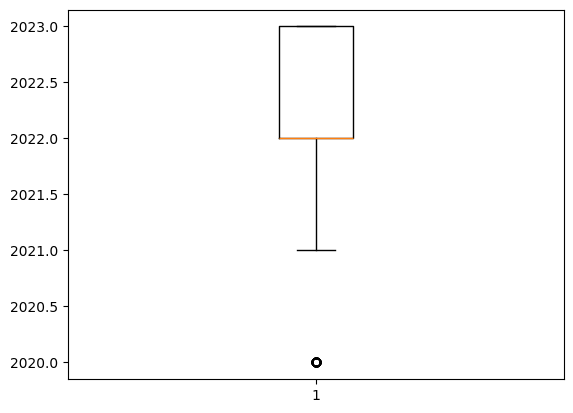

In [290]:
import matplotlib.pyplot as plt
plt.boxplot(data['work_year'])
plt.show()

In [291]:
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level,Full-time,Other,<=1L,Spain,100,Spain,Large
1,2023,Mid-level,Contract,ML Engineer,<=1L,United States,100,United States,Small
2,2023,Mid-level,Contract,ML Engineer,<=1L,United States,100,United States,Small
3,2023,Senior-level,Full-time,Data Scientist,>1L,Canada,100,Canada,Medium
4,2023,Senior-level,Full-time,Data Scientist,>1L,Canada,100,Canada,Medium
...,...,...,...,...,...,...,...,...,...
3750,2020,Senior-level,Full-time,Data Scientist,>1L,United States,100,United States,Large
3751,2021,Mid-level,Full-time,Other,>1L,United States,100,United States,Large
3752,2020,Entry-level,Full-time,Data Scientist,>1L,United States,100,United States,Small
3753,2020,Entry-level,Contract,Business Data Analyst,<=1L,United States,100,United States,Large


In [292]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize one encoder per column
experience_level_encoder = LabelEncoder()
employment_type_encoder = LabelEncoder()
job_title_encoder = LabelEncoder()
employee_residence_encoder = LabelEncoder()
company_location_encoder = LabelEncoder()
company_size_encoder = LabelEncoder()

# Encode and assign
data['experience_level'] = experience_level_encoder.fit_transform(data['experience_level'])
data['employment_type'] = employment_type_encoder.fit_transform(data['employment_type'])
data['job_title'] = job_title_encoder.fit_transform(data['job_title'])
data['employee_residence'] = employee_residence_encoder.fit_transform(data['employee_residence'])
data['company_location'] = company_location_encoder.fit_transform(data['company_location'])
data['company_size'] = company_size_encoder.fit_transform(data['company_size'])

data



,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,24,<=1L,10,100,10,0
1,2023,2,0,20,<=1L,12,100,12,2
2,2023,2,0,20,<=1L,12,100,12,2
3,2023,3,2,17,>1L,2,100,2,1
4,2023,3,2,17,>1L,2,100,2,1
...,...,...,...,...,...,...,...,...,...
3750,2020,3,2,17,>1L,12,100,12,0
3751,2021,2,2,24,>1L,12,100,12,0
3752,2020,0,2,17,>1L,12,100,12,2
3753,2020,0,0,8,<=1L,12,100,12,0


In [293]:
import joblib

joblib.dump(experience_level_encoder, "experience_level_encoder.pkl")
joblib.dump(employment_type_encoder, "employment_type_encoder.pkl")
joblib.dump(job_title_encoder, "job_title_encoder.pkl")
joblib.dump(employee_residence_encoder, "employee_residence_encoder.pkl")
joblib.dump(company_location_encoder, "company_location_encoder.pkl")
joblib.dump(company_size_encoder, "company_size_encoder.pkl")


['company_size_encoder.pkl']

In [294]:
x=data.drop(columns=['salary_in_usd'])
y=data['salary_in_usd']
x


,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,24,10,100,10,0
1,2023,2,0,20,12,100,12,2
2,2023,2,0,20,12,100,12,2
3,2023,3,2,17,2,100,2,1
4,2023,3,2,17,2,100,2,1
...,...,...,...,...,...,...,...,...
3750,2020,3,2,17,12,100,12,0
3751,2021,2,2,24,12,100,12,0
3752,2020,0,2,17,12,100,12,2
3753,2020,0,0,8,12,100,12,0


In [295]:
y

,salary_in_usd
0,<=1L
1,<=1L
2,<=1L
3,>1L
4,>1L
...,...
3750,>1L
3751,>1L
3752,>1L
3753,<=1L


In [296]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[1.        , 1.        , 0.66666667, ..., 1.        , 0.83333333,
        0.        ],
       [1.        , 0.66666667, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.66666667, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.66666667, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.33333333, 1.        , 0.66666667, ..., 0.5       , 0.5       ,
        0.        ]])

In [297]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=23, stratify=y)

In [298]:
xtrain

array([[1.        , 1.        , 0.66666667, ..., 0.        , 1.        ,
        0.5       ],
       [1.        , 0.66666667, 0.66666667, ..., 0.        , 1.        ,
        0.5       ],
       [0.66666667, 0.        , 0.66666667, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.66666667, 0.        , 0.66666667, ..., 1.        , 0.66666667,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 1.        , 1.        ,
        0.5       ],
       [0.66666667, 1.        , 0.66666667, ..., 1.        , 1.        ,
        0.5       ]])

In [299]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predict=knn.predict(xtest)
predict

array(['>1L', '>1L', '>1L', '>1L', '>1L', '<=1L', '>1L', '>1L', '<=1L',
       '<=1L', '>1L', '<=1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '<=1L', '>1L', '>1L', '>1L',
       '>1L', '<=1L', '>1L', '>1L', '<=1L', '>1L', '<=1L', '>1L', '>1L',
       '>1L', '<=1L', '>1L', '>1L', '>1L', '>1L', '<=1L', '>1L', '>1L',
       '>1L', '<=1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '<=1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '<=1L', '>1L', '>1L', '>1L', '>1L',
       '<=1L', '>1L', '>1L', '>1L', '>1L', '<=1L', '<=1L', '>1L', '<=1L',
       '<=1L', '>1L', '>1L', '>1L', '<=1L', '<=1L', '<=1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '<=1L', '>1L', '>1L', '>1L', '>1L', '<=1L', '>1L', '<=1L', '>1L',
       '>1L', '<=1L', '>1L', '>1L', '>1L', '>1L', '>1L', '<=1L', '>1L',
       '>1L', '<=1L', '>1L', '>1L', '<=1L', '>1L', '>1L', '>1L',

In [300]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,predict))

0.8681757656458056


In [301]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
predict=lr.predict(xtest)
predict

array(['>1L', '>1L', '>1L', '>1L', '>1L', '<=1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '<=1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '<=1L', '<=1L', '>1L', '>1L', '>1L',
       '>1L', '<=1L', '>1L', '>1L', '<=1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '<=1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '<=1L', '<=1L', '>1L', '>1L', '<=1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '<=1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '<=1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '<=1L', '<=1L', '>1L', '>1L',
       '<=1L', '>1L', '>1L', '>1L', '<=1L', '<=1L', '<=1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '<=1L', '>1L', '<=1L', '>1L',
       '>1L', '>1L', '>1L', '<=1L', '>1L', '>1L', '>1L', '>1L', '<=1L',
       '>1L', '<=1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L

In [302]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,predict))

0.7922769640479361


In [303]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='adam',hidden_layer_sizes=(5,2),random_state=2,max_iter=2000)
clf.fit(xtrain,ytrain)
predict2=clf.predict(xtest)
predict2

array(['>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L', '>1L',
       '>1L', '>1L',

In [304]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,predict2))

0.7097203728362184


In [305]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(xtrain, ytrain)
    ypred = pipe.predict(xtest)
    acc = accuracy_score(ytest, ypred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(ytest, ypred))


LogisticRegression Accuracy: 0.7590
              precision    recall  f1-score   support

        <=1L       0.60      0.62      0.61       226
         >1L       0.83      0.82      0.83       525

    accuracy                           0.76       751
   macro avg       0.71      0.72      0.72       751
weighted avg       0.76      0.76      0.76       751

RandomForest Accuracy: 0.7909
              precision    recall  f1-score   support

        <=1L       0.65      0.67      0.66       226
         >1L       0.86      0.84      0.85       525

    accuracy                           0.79       751
   macro avg       0.75      0.76      0.75       751
weighted avg       0.79      0.79      0.79       751

KNN Accuracy: 0.8083
              precision    recall  f1-score   support

        <=1L       0.72      0.60      0.65       226
         >1L       0.84      0.90      0.87       525

    accuracy                           0.81       751
   macro avg       0.78      0.75      0.

In [306]:
print(classification_report(ytest, preds))
print(confusion_matrix(ytest, preds))
print("="*40)

              precision    recall  f1-score   support

         <1L       0.00      0.00      0.00         0
        <=1L       0.00      0.00      0.00       226
         >1L       0.83      0.94      0.88       525

    accuracy                           0.66       751
   macro avg       0.28      0.31      0.29       751
weighted avg       0.58      0.66      0.62       751

[[  0   0   0]
 [126   0 100]
 [ 31   0 494]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

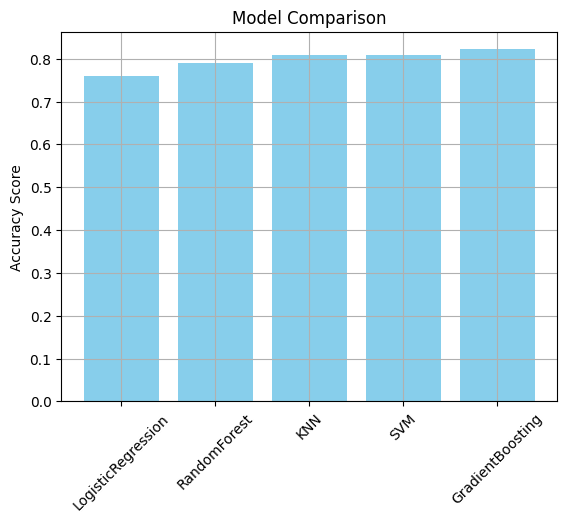

In [307]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
# ✅ Modified: Use class_weight='balanced' where supported
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(class_weight='balanced'),
    "KNN": KNeighborsClassifier(),  # KNN does not support class weights
    "SVM": SVC(class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier()  # Optional: use sampling if needed
}


results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]:.4f}")
joblib.dump(best_model, "model.pkl")
print("✅ Saved best model as model.pkl")


LogisticRegression: 0.7590
RandomForest: 0.7896
KNN: 0.8069
SVM: 0.7816
GradientBoosting: 0.8229

Best model: GradientBoosting with accuracy 0.8229
✅ Saved best model as model.pkl


In [309]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load model and encoders
model = joblib.load("model.pkl")

def load_encoder(name):
    return joblib.load(f"{name}_encoder.pkl")

experience_level_encoder = load_encoder("experience_level")
employment_type_encoder = load_encoder("employment_type")
job_title_encoder = load_encoder("job_title")
employee_residence_encoder = load_encoder("employee_residence")
company_location_encoder = load_encoder("company_location")
company_size_encoder = load_encoder("company_size")

# Streamlit App
st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")
st.title("💼 Employee Salary Classification ")
st.markdown("Predict an employee's salary class based on input features.")

# Sidebar Inputs
st.sidebar.header("Input Employee Details")

work_year = st.sidebar.number_input(
    "Work Year",
    min_value=2020,
    max_value=2050,
    value=2026,
    step=1,
    format="%d"
)

experience_level = st.sidebar.selectbox("Experience Level", experience_level_encoder.classes_.tolist())
employment_type = st.sidebar.selectbox("Employment Type", employment_type_encoder.classes_.tolist())
job_title = st.sidebar.selectbox("Job Title", job_title_encoder.classes_.tolist())
employee_residence = st.sidebar.selectbox("Employee Residence", employee_residence_encoder.classes_.tolist())
remote_ratio = st.sidebar.selectbox("Remote Ratio (%)", [0, 50, 100])
company_location = st.sidebar.selectbox("Company Location", company_location_encoder.classes_.tolist())
company_size = st.sidebar.selectbox("Company Size", company_size_encoder.classes_.tolist())

# Display Data
display_df = pd.DataFrame({
    "Work Year": [work_year],
    "Experience Level": [experience_level],
    "Employment Type": [employment_type],
    "Job Title": [job_title],
    "Employee Residence": [employee_residence],
    "Remote Ratio": [remote_ratio],
    "Company Location": [company_location],
    "Company Size": [company_size],
})
st.write("### 🔎 Input Data")
st.dataframe(display_df)

# Encode Inputs
# Create prediction DataFrame (encoded values)
input_df = pd.DataFrame({
        "work_year": [work_year],
        "experience_level": [experience_level_encoder.transform([experience_level])[0]],
        "employment_type": [employment_type_encoder.transform([employment_type])[0]],
        "job_title": [job_title_encoder.transform([job_title])[0]],
        "employee_residence": [employee_residence_encoder.transform([employee_residence])[0]],
        "remote_ratio": [remote_ratio],
        "company_location": [company_location_encoder.transform([company_location])[0]],
        "company_size": [company_size_encoder.transform([company_size])[0]],
    })

# Prediction
if st.button("Predict Salary Class"):
        prediction = model.predict(input_df)
        st.success(f"✅ Prediction: {prediction[0]}")


# Batch Prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

required_columns = [
    "work_year", "experience_level", "employment_type", "job_title",
    "employee_residence", "remote_ratio", "company_location", "company_size"
]

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())

    if all(col in batch_data.columns for col in required_columns):
        display_batch = batch_data.copy()

        def safe_transform(col, encoder):
            return col.apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1)

        batch_data["experience_level"] = safe_transform(batch_data["experience_level"], experience_level_encoder)
        batch_data["employment_type"] = safe_transform(batch_data["employment_type"], employment_type_encoder)
        batch_data["job_title"] = safe_transform(batch_data["job_title"], job_title_encoder)
        batch_data["employee_residence"] = safe_transform(batch_data["employee_residence"], employee_residence_encoder)
        batch_data["company_location"] = safe_transform(batch_data["company_location"], company_location_encoder)
        batch_data["company_size"] = safe_transform(batch_data["company_size"], company_size_encoder)

        try:
            preds = model.predict(batch_data[required_columns])
            display_batch["PredictedClass"] = preds
            st.dataframe(display_batch)

            csv = display_batch.to_csv(index=False).encode("utf-8")
            st.download_button("Download Predictions CSV", csv, file_name="predicted_classes.csv", mime="text/csv")
        except Exception as e:
            st.error(f"Batch prediction failed: {e}")
    else:
        st.error("Missing required columns in uploaded file.")


Overwriting app.py


In [310]:
!kill -9 $(ps -A | grep ngrok | awk '{print $1}')

In [311]:
!pip install streamlit pyngrok

In [312]:
!ngrok authtoken 2zzR7nFJi1PnCweumAyHFjTOc28_4zEHJk4Z4rTje1Eegv9rz

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [313]:
import os
import threading

def run_streamlit():
    os.system('streamlit run app.py --server.port 8502')

thread = threading.Thread(target=run_streamlit)
thread.start()

In [314]:
from pyngrok import ngrok
import time

time.sleep(5)


public_url=ngrok.connect(8502)
print("your streamlit app is live here:",public_url)

your streamlit app is live here: NgrokTunnel: "https://89d44dbabb84.ngrok-free.app" -> "http://localhost:8502"
